In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# 强制升级 scikit-learn 和 imbalanced-learn
!pip install --upgrade --force-reinstall scikit-learn==1.2.2 imbalanced-learn==0.10.1 --quiet

/kaggle/input/creditcardfraud/creditcard.csv
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 42.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-fft 1.3.8 requires numpy<1

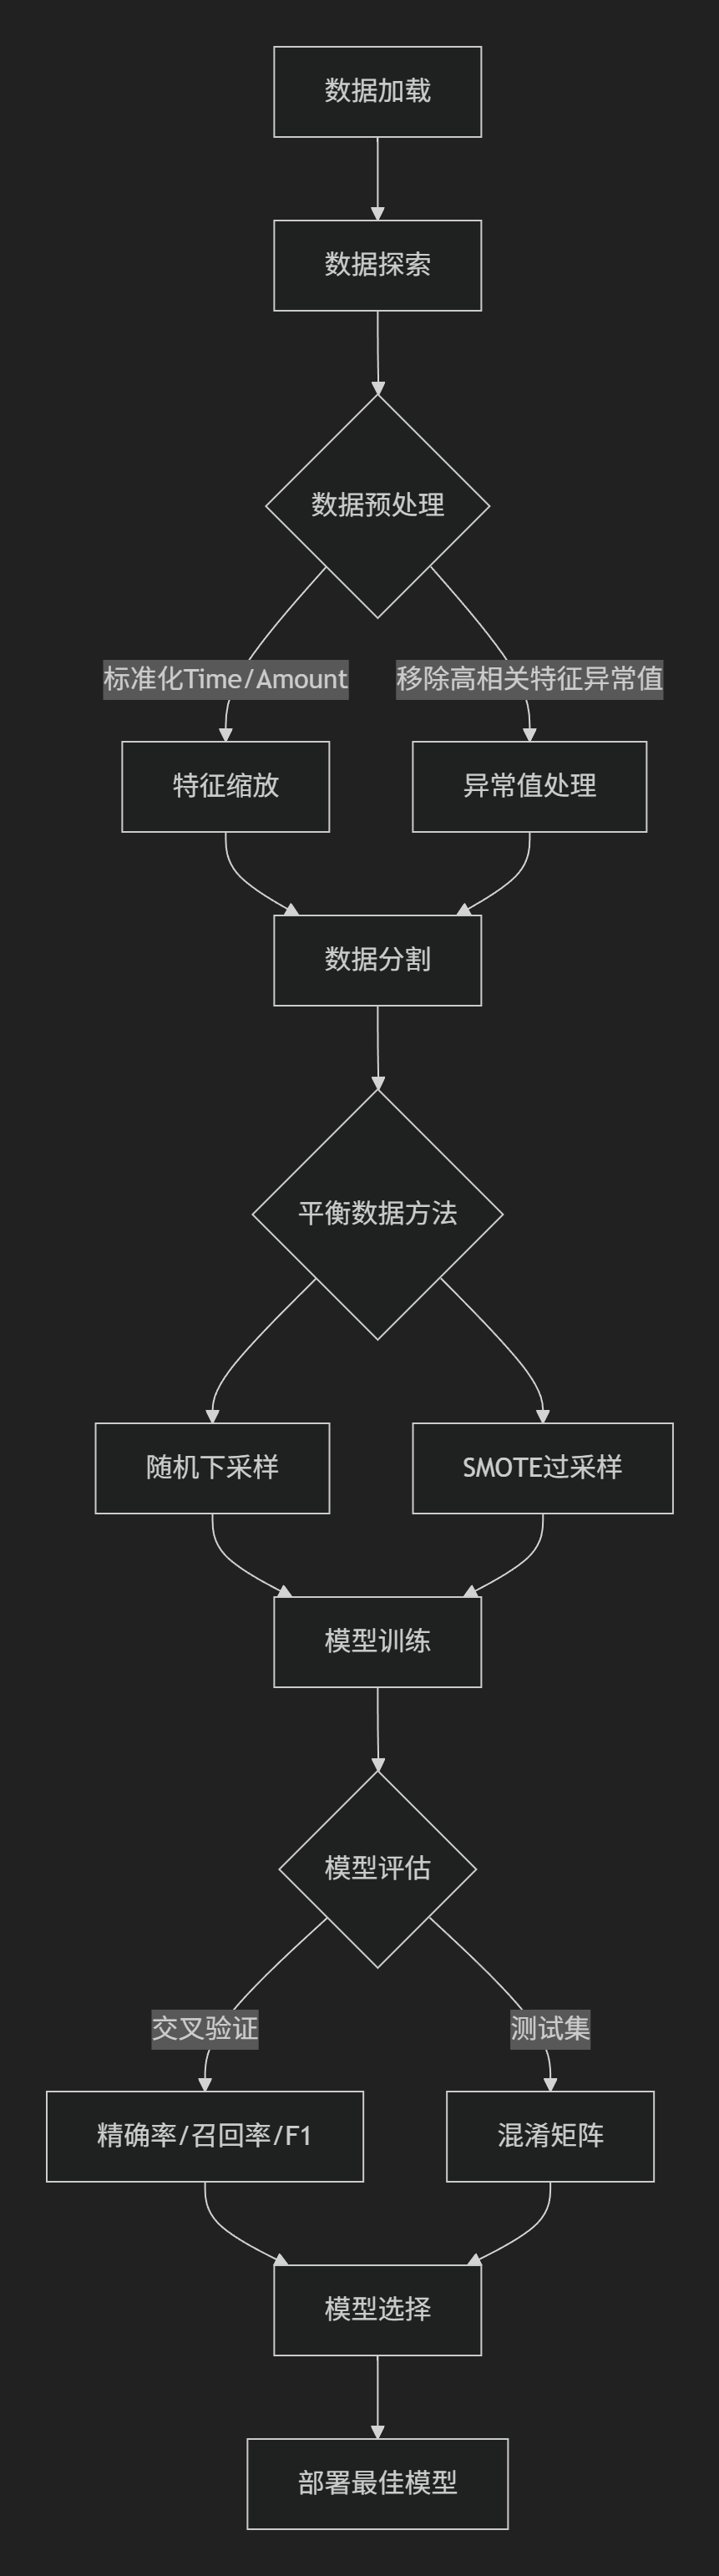

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv",header=0,sep=',')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.isnull().sum().max()#检测是否有缺失值

0

In [9]:
#我们要对class进行处理，其中异常用Frauds而不是异常的我们用No Frauds表示
#而在我们的class中则是用1、0来表示这里为了直观的观察我们的异常的数量情况，我们用一个可视化图标来进行展示

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

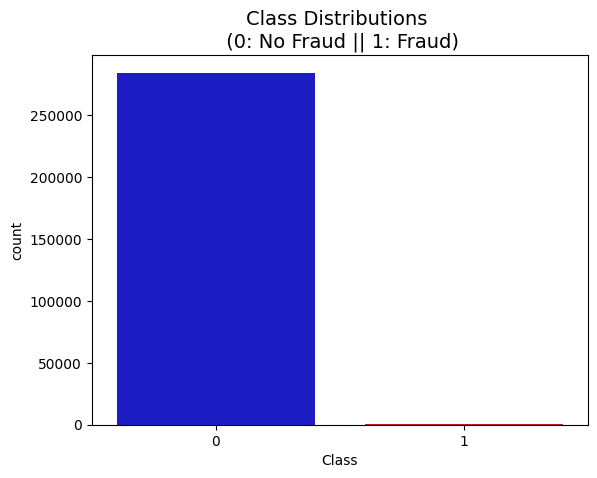

In [11]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class',data=df,palette=colors)
#这里要指定我们的x才能把我们的图表显示出要不然，她只会显示0值
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

<Axes: ylabel='Count'>

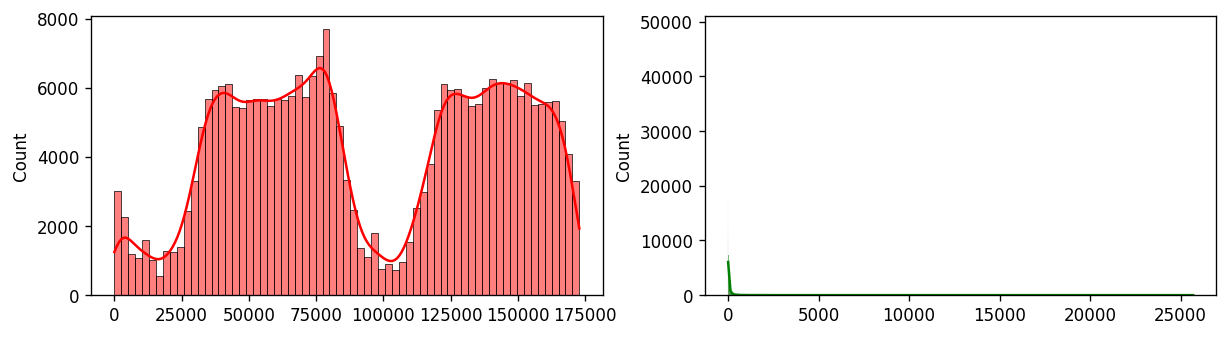

In [12]:
#我们知道异常的大致数量以后我们就要尝试刻画Time以及Amount
plt.figure(figsize=(12,3),dpi=121)
plt.subplot(121)
Time_val=df['Time'].values
sns.histplot(Time_val,color='r',kde=True)
plt.subplot(122)
Amount_val=df['Amount'].values
sns.histplot(Amount_val,color='g',kde=True)

# 数据预处理

In [13]:
#数据标准化
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scaler=StandardScaler()
rob_scaler=RobustScaler()
df['scaler_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaler_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'],axis=1,inplace=True)

In [14]:
#将两项数据放在最前面这样看着更加好看
scaled_amount = df['scaler_amount']
scaled_time = df['scaler_time']

df.drop(['scaler_amount', 'scaler_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [15]:
#数据划分
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
X = df.drop('Class', axis=1)
y = df['Class']
#1. 创建分层 K 折交叉验证对象
sss=StratifiedKFold(n_splits=5,random_state=43,shuffle=True)
#2. 遍历交叉验证的每一折
for train_index,test_index in sss.split(X,y):    
#3. 根据索引划分训练集和测试集
    original_Xtrain,original_Xtest=X.iloc[train_index],X.iloc[test_index]
    original_ytrain,original_ytest=y.iloc[train_index],y.iloc[test_index]
#4. 将数据转换为 NumPy 数组
original_Xtrain=original_Xtrain.values
original_Xtest=original_Xtest.values
original_ytrain=original_ytrain.values
original_ytest=original_ytest.values

#5.检查标签分布
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


# 通过下采样平衡数据

In [16]:
df = df.sample(frac=1,random_state=43)
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=43)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
52466,-0.293440,-0.460872,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,...,0.276893,1.186036,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1
217984,-0.289387,0.662954,2.014802,0.001084,-0.976178,0.308848,-0.010410,-0.910529,0.174652,-0.270445,...,-0.130879,-0.216221,-0.458622,0.323537,0.114399,-0.295070,0.168223,-0.065508,-0.066358,0
248767,-0.255712,0.815247,-1.758249,0.259696,-0.878749,-1.821055,2.005039,3.587499,-1.074420,1.845327,...,-0.584927,-0.130827,-0.509801,0.588436,0.666281,-0.049875,-0.258264,-0.523161,-0.094729,0
158941,0.234612,0.320739,-1.444050,1.560794,0.011318,1.083641,-0.679943,0.563849,-0.531925,1.419265,...,-0.434652,-0.234935,-0.878016,0.212271,-0.614826,-0.749353,-1.011945,-0.347257,-0.029002,0
41258,-0.294977,-0.517863,-1.223311,0.655179,0.770516,0.421872,1.062246,0.145798,-0.113433,0.571236,...,0.269540,-0.184829,-0.862754,-0.261287,-1.341808,0.140858,0.385265,-0.050103,-0.099505,0


<Axes: >

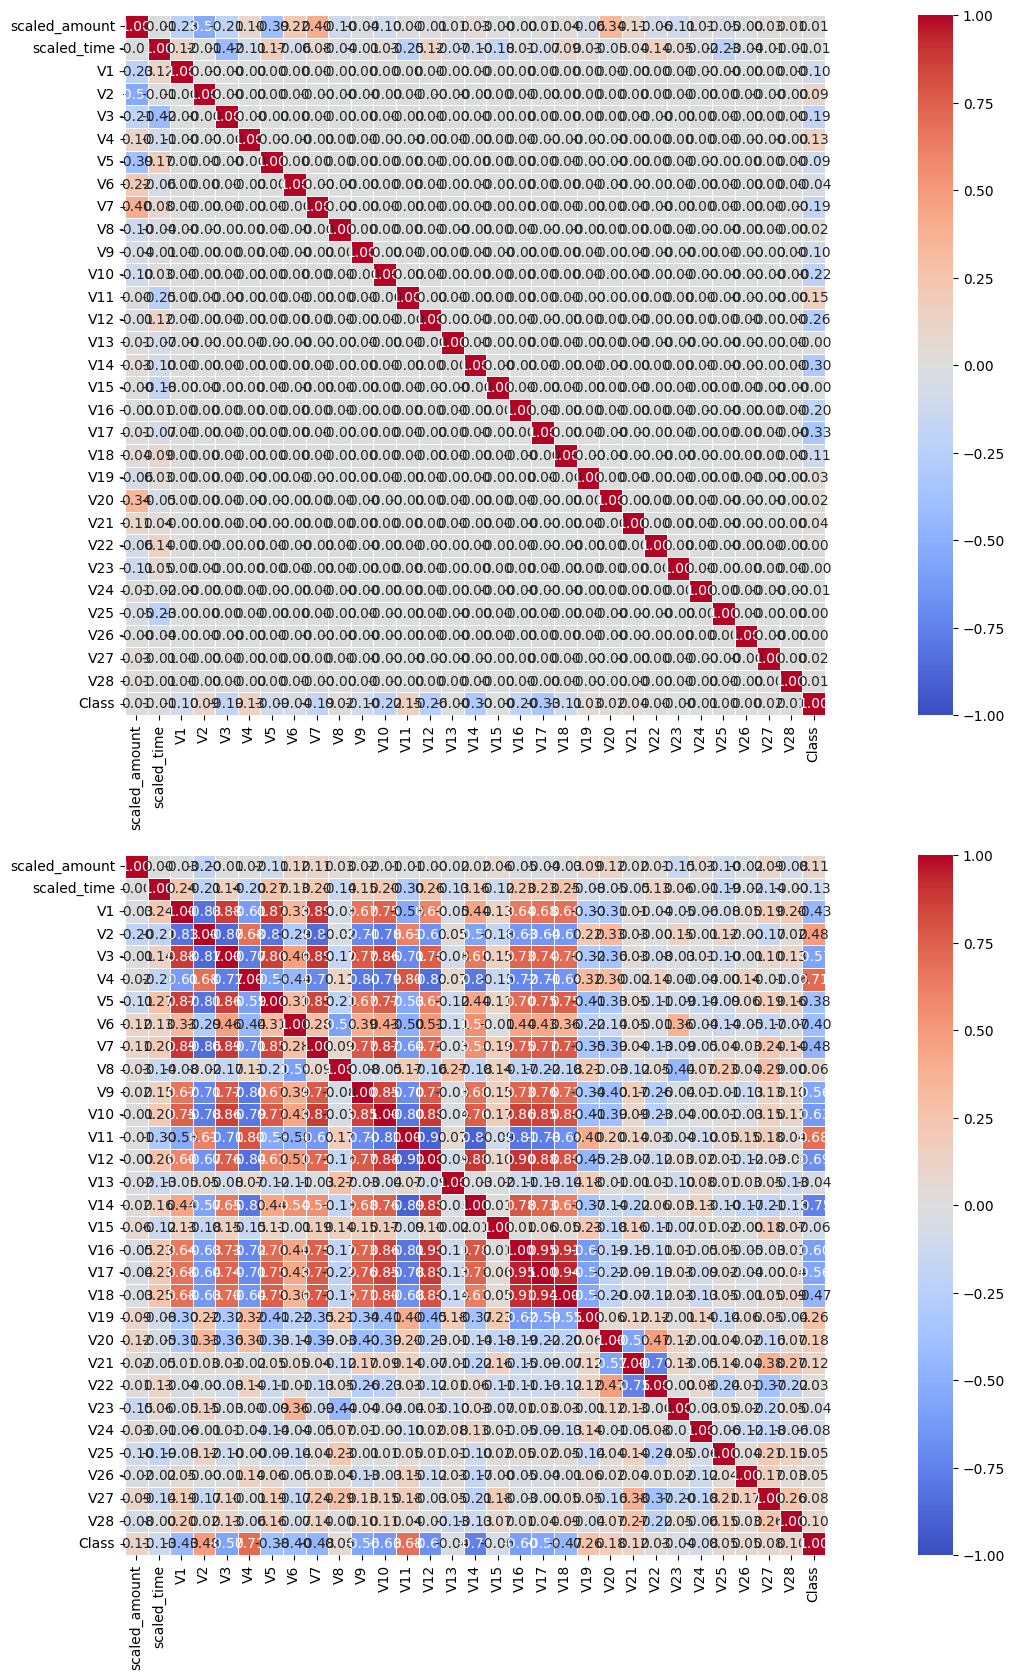

In [17]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(24,20))
corr=df.corr()
sns.heatmap(
            corr,
            annot=True,          # 显示数值（如你的图片中的0.90、-0.08等）
            fmt=".2f",           # 数值格式为两位小数（调整精度）
            cmap="coolwarm",     # 颜色映射：蓝-白-红（与你的图片一致）
            linewidths=0.5,      # 单元格边线宽度
            linecolor="white",   # 边线颜色（增强单元格分隔效果）
            cbar=True,           # 显示右侧颜色条
            square=True,         # 单元格为正方形（排版更整齐）
            vmin=-1, 
            vmax=1,
            ax=ax1                
)

new_corr=new_df.corr()
sns.heatmap(
            new_corr,
            annot=True,          # 显示数值（如你的图片中的0.90、-0.08等）
            fmt=".2f",           # 数值格式为两位小数（调整精度）
            cmap="coolwarm",     # 颜色映射：蓝-白-红（与你的图片一致）
            linewidths=0.5,      # 单元格边线宽度
            linecolor="white",   # 边线颜色（增强单元格分隔效果）
            cbar=True,           # 显示右侧颜色条
            square=True,         # 单元格为正方形（排版更整齐）
            vmin=-1, vmax=1,
            ax=ax2
)

相关矩阵
相关矩阵是理解我们数据的关键所在。我们想要知道是否存在对特定交易是否为欺诈交易有重大影响的特征。然而，重要的是我们要使用正确的数据帧（子样本），这样我们才能看出哪些特征与欺诈交易之间存在较高的正相关或负相关关系。
总结与解释：
负相关：特征 V17、V14、V12 和 V10 呈负相关。请注意，这些值越低，最终结果越有可能是欺诈交易。
正相关：特征 V2、V4、V11 和 V19 呈正相关。请注意，这些值越高，最终结果越有可能是欺诈交易。
箱线图：我们将使用箱线图来更好地了解这些特征在欺诈交易和非欺诈交易中的分布情况。
注意：我们必须确保在相关矩阵中使用子样本，否则我们的相关矩阵会受到我们数据类别中高度不平衡的影响。这种情况的发生是由于原始数据帧中存在高度的类别不平衡。

箱线图（Boxplot）是一种用于​​可视化数据分布和识别异常值​​的统计图表，尤其在数据分析中常用于探索性分析（EDA）。以下是箱线图的核心作用及具体解释：

​​1. 展示数据分布的关键统计量​​
箱线图通过五个关键指标描述数据分布：

​​中位数（Median）​​：箱体中间的横线，代表数据的中心位置。
​​四分位数​​：
​​Q1（第一四分位）​​：箱体下边界，25%的数据小于此值。
​​Q3（第三四分位）​​：箱体上边界，75%的数据小于此值。
​​IQR（四分位距）​​：Q3 - Q1，反映数据中间50%的分布范围。
​​须线（Whiskers）​​：
上限：Q3 + 1.5×IQR（正常值的最大可能范围）。
下限：Q1 - 1.5×IQR（正常值的最小可能范围）。
​​异常值（Outliers）​​：超出须线的数据点，可能是极端值或噪声。
![Boxplot结构示意图](https://miro.medium.com/v2/resize:fit:1200/1 * 2c21SkzJMgg3BmBX6oX2vA.png)

​​2. 核心作用​​
​​(1) 快速对比不同组别数据分布​​
​​应用场景​​：
比较不同类别（如欺诈/非欺诈交易）的同一特征分布差异。
​​示例​​：
在信用卡欺诈检测中，通过箱线图发现欺诈交易（Class=1）的 V14 值显著低于非欺诈交易，说明该特征与欺诈强负相关。
​​(2) 识别异常值（Outliers）​​
​​应用场景​​：
检测数据中的极端值，指导后续清洗或分析。
​​示例​​：
若 V14 的欺诈交易箱线图中有多个低于下限的异常值，可能需通过IQR方法移除这些点以提升模型鲁棒性。
​​(3) 评估数据偏态（Skewness）​​
​​对称性判断​​：
中位数在箱体中的位置反映数据偏态：
中位数居中：数据对称（如正态分布）。
中位数靠近Q1：数据右偏（存在右侧长尾）。
中位数靠近Q3：数据左偏（存在左侧长尾）。
​​(4) 数据离散程度分析​​
​​箱体高度（IQR）​​：
IQR越小，数据越集中；IQR越大，数据越分散。


Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

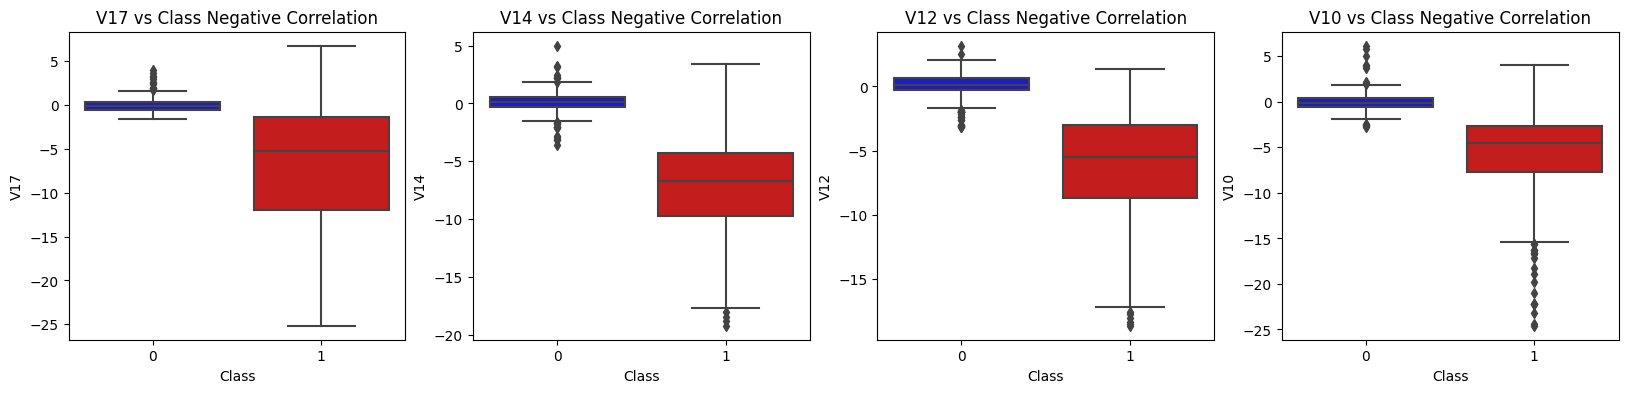

In [18]:
f,axes=plt.subplots(ncols=4,figsize=(20,4))
sns.boxplot(x='Class',y='V17',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

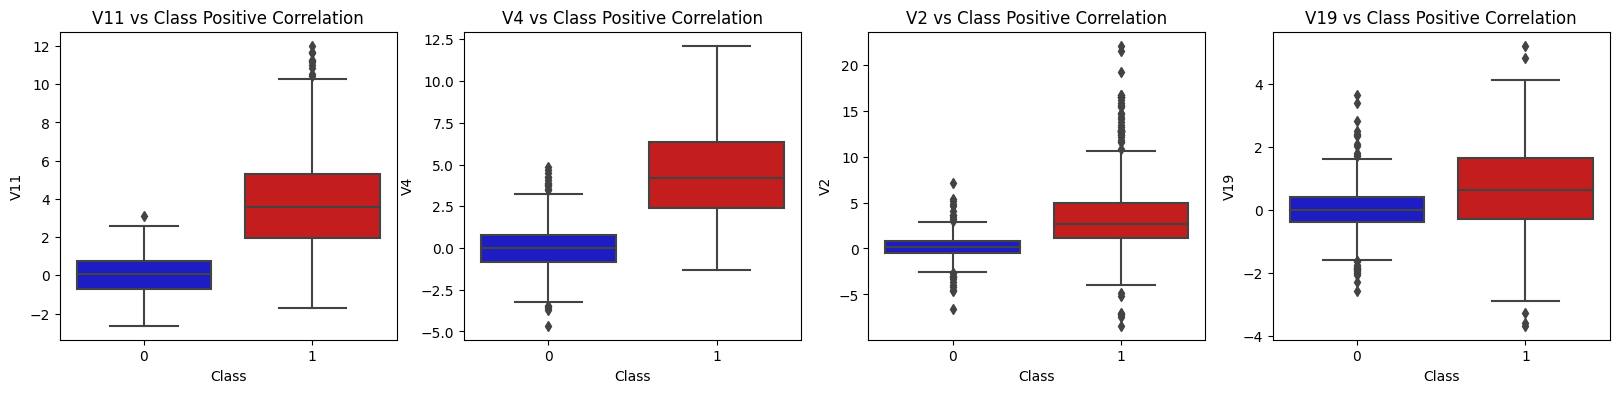

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')



* 通过降维与可视化，异常检测任务从“盲目处理高维数据”转变为“基于低维洞察驱动模型优化”，显著提升检测效率和准确性。

In [20]:
#我们用new_df来进行异常检测
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
X=new_df.drop('Class',axis=1)
y=new_df['Class']

#目的：通过降维为后续的数据可视化提供基础（如绘制2D散点图），
#直观分析欠采样后数据的分布结构或类别分离情况，
#常用于探索性数据分析（EDA）或模型诊断。
#作用将高维特征数据降维
t0=time.time()
X_reduced_tsne=TSNE(n_components=2,random_state=43).fit_transform(X.values)
t1=time.time()
print(f"T-SNE took {t1-t0}")

t0=time.time()
X_reduced_pca=PCA(n_components=2,random_state=43).fit_transform(X.values)
t1=time.time()
print(f"T-SNE took {t1-t0}")

t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.738553285598755
T-SNE took 0.0070040225982666016
Truncated SVD took 0.0043 s


| 方法               | 参数                                                                 | 功能/特点                                                                 | 使用场景                                                                 |
|--------------------|----------------------------------------------------------------------|--------------------------------------------------------------------------|-------------------------------------------------------------------------|
| **T-SNE**          | `n_components=2`, `random_state=43`                                 | 非线性降维，保留局部结构，适合高维数据可视化。                           | 探索性数据分析（EDA）、聚类/分类结果可视化、非结构化数据（如图像/文本）的可视化。 |
| **PCA**            | `n_components=2`, `random_state=43`                                 | 线性降维，最大化全局方差，计算高效。                                     | 特征工程、数据去噪、高维数据压缩（如金融/生物特征）、模型输入简化。                |
| **Truncated SVD**  | `n_components=2`, `algorithm='randomized'`, `random_state=42`        | 近似矩阵分解，支持稀疏矩阵，计算速度快。                                 | 文本数据（TF-IDF矩阵）、推荐系统、大规模稀疏数据（如用户-物品交互矩阵）的降维。     |

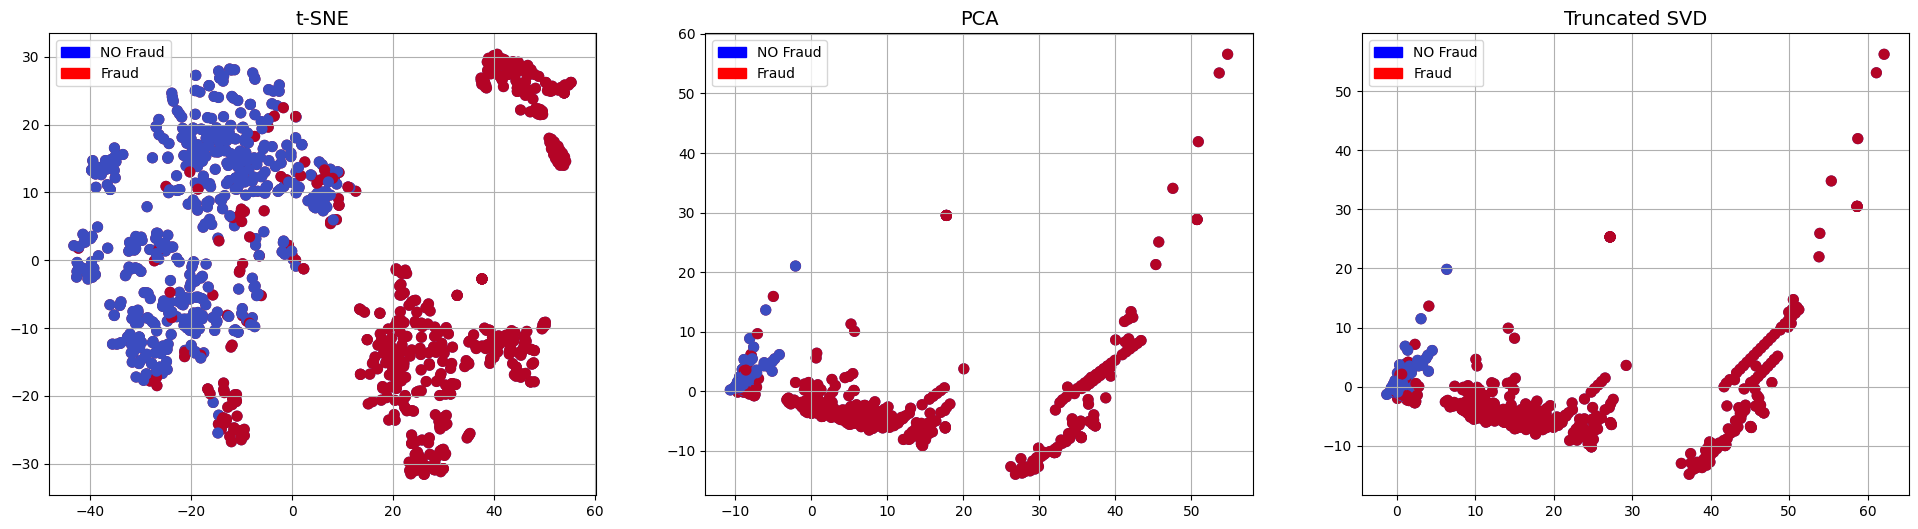

In [21]:
import matplotlib.patches as  mpatches
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(24,6))
blue_patch=mpatches.Patch(color='b',label='NO Fraud')
red_patch=mpatches.Patch(color='r',label='Fraud')

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

### 目的
对比三种降维方法（t-SNE、PCA、TruncatedSVD）在欺诈检测数据上的可视化效果，观察不同方法对类别（欺诈/非欺诈）分布的呈现能力。

### 输出
生成三个并排的散点图：
- **t-SNE子图**：展示基于t-SNE降维后的二维数据分布。
- **PCA子图**：展示基于主成分分析后的二维数据分布。
- **TruncatedSVD子图**：展示基于截断奇异值分解后的二维数据分布。
- **颜色标注**：  
  - 蓝色（`NO Fraud`）：非欺诈样本。  
  - 红色（`Fraud`）：欺诈样本。

### 适用场景
1. **数据探索**：直观分析不同降维方法是否有助于区分类别（欺诈与非欺诈）。
2. **方法对比**：评估t-SNE（非线性）、PCA（线性全局）、TruncatedSVD（稀疏优化）的降维效果差异。
3. **模型辅助**：为后续特征工程或模型选择（如分类算法）提供可视化依据。

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#找出最适合的分类
X=new_df.drop('Class',axis=1)
y=new_df['Class']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values
#选择我们要使用的分类器
classifiers={
    'LogisticRegression':LogisticRegression(),
    'KNearest':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}
#用字典将分类器做一个整合
from sklearn.model_selection import cross_val_score

for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [23]:
#超参数的配置
from sklearn.model_selection import GridSearchCV
grid_log_params={"penalty":['l1','l2'],
                 'C':[0.001,0.01,1,10,100,1000]
                }

grid_log_reg=GridSearchCV(LogisticRegression(),grid_log_params)
grid_log_reg.fit(X_train,y_train)
log_reg=grid_log_reg.best_estimator_

knears_params={"n_neighbors":list(range(2,5,1)),
               "algorithm":['auto','ball_tree','kd_tree','brute']
              }

grid_knears=GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

# 异常检测模型参数调优与应用分析

## 各模型参数配置与异常检测作用

| 模型                | 参数及说明                                                                                                   | 异常检测中的作用                                                                                           |
|---------------------|------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **逻辑回归**         | **penalty**: `l1`(稀疏化特征)/`l2`(保留特征)<br>**C**: 小值强正则化，大值弱正则化                          | - 输出概率用于阈值判断（如概率>0.9视为异常）<br>- `l1`正则化自动筛选关键特征（交易金额/频率）               |
| **K近邻**           | **n_neighbors**: 小值敏感，大值平滑边界<br>**algorithm**: 搜索算法影响效率（如`kd_tree`适合低维）           | - 基于局部密度检测异常（异常点邻居少）<br>- 需结合SMOTE/调整距离权重解决类别不平衡                          |
| **支持向量机**       | **C**: 小值允许误分类（宽边界），大值严格分类<br>**kernel**: `rbf`（非线性）/`linear`（线性）               | - 最大化边界分离正常与异常<br>- `rbf`核捕捉复杂模式（需防范过拟合）                                         |
| **决策树**           | **criterion**: 分裂规则（基尼系数/信息增益）<br>**max_depth**: 控制复杂度<br>**min_samples_leaf**: 防噪声  | - 通过树结构规则提供可解释性（如"金额>X且频率<Y"）<br>- 浅层树提升稳定性（金融风控场景）                    |

---

## 关键应用策略

| 应用方向               | 策略说明                                                                                                   |
|------------------------|------------------------------------------------------------------------------------------------------------|
| **模型选择与集成**      | - 对比各模型最佳参数的精确率/召回率<br>- 使用投票法集成（如逻辑回归+K近邻+决策树）提升鲁棒性               |
| **处理类别不平衡**      | - 验证集保持原始分布评估效果<br>- 在`GridSearchCV`中设置`scoring='f1'`或`scoring='roc_auc'`优化不平衡数据  |
| **特征重要性分析**      | - 分析逻辑回归系数（关键特征权重）<br>- 提取决策树分裂节点（异常规则逻辑）                                 |
| **自动化调参**          | - 网格搜索系统化遍历参数组合（如`C`从0.001到1000）<br>- 减少人工试错成本，加速最优参数发现                 |

In [24]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.03%
Knears Neighbors Cross Validation Score 92.75%
Support Vector Classifier Cross Validation Score 93.65%
DecisionTree Classifier Cross Validation Score 92.12%


In [25]:
# 确保导入以下模块
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score
)

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# 定义参数和模型
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
accuracy_lst=[]
precision_lst=[]
recall_lst=[]
f1_lst=[]
auc_lst=[]




# 使用 make_pipeline 创建流水线 ✅
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = make_pipeline(
        SMOTE(sampling_strategy='minority'), 
        rand_log_reg
    )
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)
    

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.974596875333436
precision: 0.058262061544806266
recall: 0.9010386238234339
f1: 0.10943418485653307
---------------------------------------------------------------------------------------------------------------------------------------
